## We have the investment series at a company level and the company status. We will be trying to predict the status of the startup based on various investment factors

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import binarize
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.dummy import DummyClassifier
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

https://www.kaggle.com/arindam235/startup-investments-crunchbase

In [2]:
investments_df = pd.read_csv("investments_VC.csv", encoding ='latin1')
investments_df.head()

,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
0,/organization/waywire,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,News,"17,50,000",acquired,USA,NY,New York City,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,/organization/tv-communications,&TV Communications,http://enjoyandtv.com,|Games|,Games,"40,00,000",operating,USA,CA,Los Angeles,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,/organization/rock-your-paper,'Rock' Your Paper,http://www.rockyourpaper.org,|Publishing|Education|,Publishing,"40,000",operating,EST,NaN,Tallinn,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,/organization/in-touch-network,(In)Touch Network,http://www.InTouchNetwork.com,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,"15,00,000",operating,GBR,NaN,London,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,/organization/r-ranch-and-mine,-R- Ranch and Mine,NaN,|Tourism|Entertainment|Games|,Tourism,"60,000",operating,USA,TX,Dallas,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
investments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54294 entries, 0 to 54293
Data columns (total 39 columns):
permalink               49438 non-null object
name                    49437 non-null object
homepage_url            45989 non-null object
category_list           45477 non-null object
 market                 45470 non-null object
 funding_total_usd      49438 non-null object
status                  48124 non-null object
country_code            44165 non-null object
state_code              30161 non-null object
region                  44165 non-null object
city                    43322 non-null object
funding_rounds          49438 non-null float64
founded_at              38554 non-null object
founded_month           38482 non-null object
founded_quarter         38482 non-null object
founded_year            38482 non-null float64
first_funding_at        49438 non-null object
last_funding_at         49438 non-null object
seed                    49438 non-null float64
venture       

In [4]:
#Checking for missing values
investments_df.isnull().sum()*100/investments_df.isnull().count()

permalink                8.943898
name                     8.945740
homepage_url            15.296350
category_list           16.239363
 market                 16.252256
 funding_total_usd       8.943898
status                  11.364055
country_code            18.655837
state_code              44.448742
region                  18.655837
city                    20.208494
funding_rounds           8.943898
founded_at              28.990312
founded_month           29.122923
founded_quarter         29.122923
founded_year            29.122923
first_funding_at         8.943898
last_funding_at          8.943898
seed                     8.943898
venture                  8.943898
equity_crowdfunding      8.943898
undisclosed              8.943898
convertible_note         8.943898
debt_financing           8.943898
angel                    8.943898
grant                    8.943898
private_equity           8.943898
post_ipo_equity          8.943898
post_ipo_debt            8.943898
secondary_mark

In [5]:
investments_df['funding_total_usd']  = investments_df[' funding_total_usd ']
investments_df.drop(' funding_total_usd ', axis = 1, inplace = True)
investments_df['market'] = investments_df[' market ']
investments_df.drop(' market ', axis = 1, inplace = True)

In [8]:
investments_df.tail()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,funding_rounds,...,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H,funding_total_usd,market
54289,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54290,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54291,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54292,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54293,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### It appears that the 4856 rows at the bottom of the dataset are missing, dropping all those rows that have missing values

In [9]:
investments_df1 = investments_df.copy()

In [10]:
## creating a dataset by removing the missing values at the bottom of the dataset
in_df1 = investments_df.copy()
investments_df = in_df1.iloc[0:49438]

In [11]:
# Checking for missing values again after dropping the bottom rows
investments_df.isnull().sum()*100/investments_df.isnull().count()

permalink                0.000000
name                     0.002023
homepage_url             6.976415
category_list            8.012056
status                   2.657875
country_code            10.665885
state_code              38.992273
region                  10.665885
city                    12.371051
funding_rounds           0.000000
founded_at              22.015454
founded_month           22.161091
founded_quarter         22.161091
founded_year            22.161091
first_funding_at         0.000000
last_funding_at          0.000000
seed                     0.000000
venture                  0.000000
equity_crowdfunding      0.000000
undisclosed              0.000000
convertible_note         0.000000
debt_financing           0.000000
angel                    0.000000
grant                    0.000000
private_equity           0.000000
post_ipo_equity          0.000000
post_ipo_debt            0.000000
secondary_market         0.000000
product_crowdfunding     0.000000
round_A       

In [12]:
investments_df['status'].value_counts()

operating    41829
acquired      3692
closed        2603
Name: status, dtype: int64

In [13]:
## Dropping missing values in status column
investments_df.dropna(subset = ['status'], inplace = True)

In [14]:
## using numeric data for dummy classification
X = investments_df1.select_dtypes(include =['float', 'int'])
le = LabelEncoder()
y = le.fit_transform(investments_df1['status'].astype(str))
y

array([0, 3, 3, ..., 2, 2, 2])

In [15]:
dummy_clf = DummyClassifier(strategy="most_frequent")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
dummy_clf.fit(X_train, y_train)

dummy_clf.predict(X_test)

print("The Dummy Classification score is {}" .format(dummy_clf.score(X_test, y_test)))
dummy_report = classification_report(y_test, dummy_clf.predict(X_test))
print(dummy_report)

The Dummy Classification score is 0.7733439744612929
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1086
           1       0.00      0.00      0.00       763
           2       0.00      0.00      0.00      1843
           3       0.77      1.00      0.87     12597

    accuracy                           0.77     16289
   macro avg       0.19      0.25      0.22     16289
weighted avg       0.60      0.77      0.67     16289



In [16]:
dummy_report = classification_report(y_test, dummy_clf.predict(X_test))
print(dummy_report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1086
           1       0.00      0.00      0.00       763
           2       0.00      0.00      0.00      1843
           3       0.77      1.00      0.87     12597

    accuracy                           0.77     16289
   macro avg       0.19      0.25      0.22     16289
weighted avg       0.60      0.77      0.67     16289



In [17]:
#Converting funding_total_usd variable to float
investments_df['funding_total_usd'] = investments_df['funding_total_usd'].str.replace(',', '')
investments_df['funding_total_usd'] = investments_df['funding_total_usd'].str.replace('-', 'Nan')
investments_df['funding_total_usd'] = investments_df['funding_total_usd'].astype('float')

In [19]:
#Converting the target variable to 1's and 0's
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
target = le.fit_transform(investments_df['status'])

In [20]:
# Dividing data into numerical and categorical an d looking into correlation between numeric variables
numeric_data = investments_df.select_dtypes(include = ['float', 'int'])
categorical_data = investments_df.select_dtypes(include =['object'])
numeric_data.head()
numeric_corr = numeric_data.corr()

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5]), <a list of 24 Text yticklabel objects>)

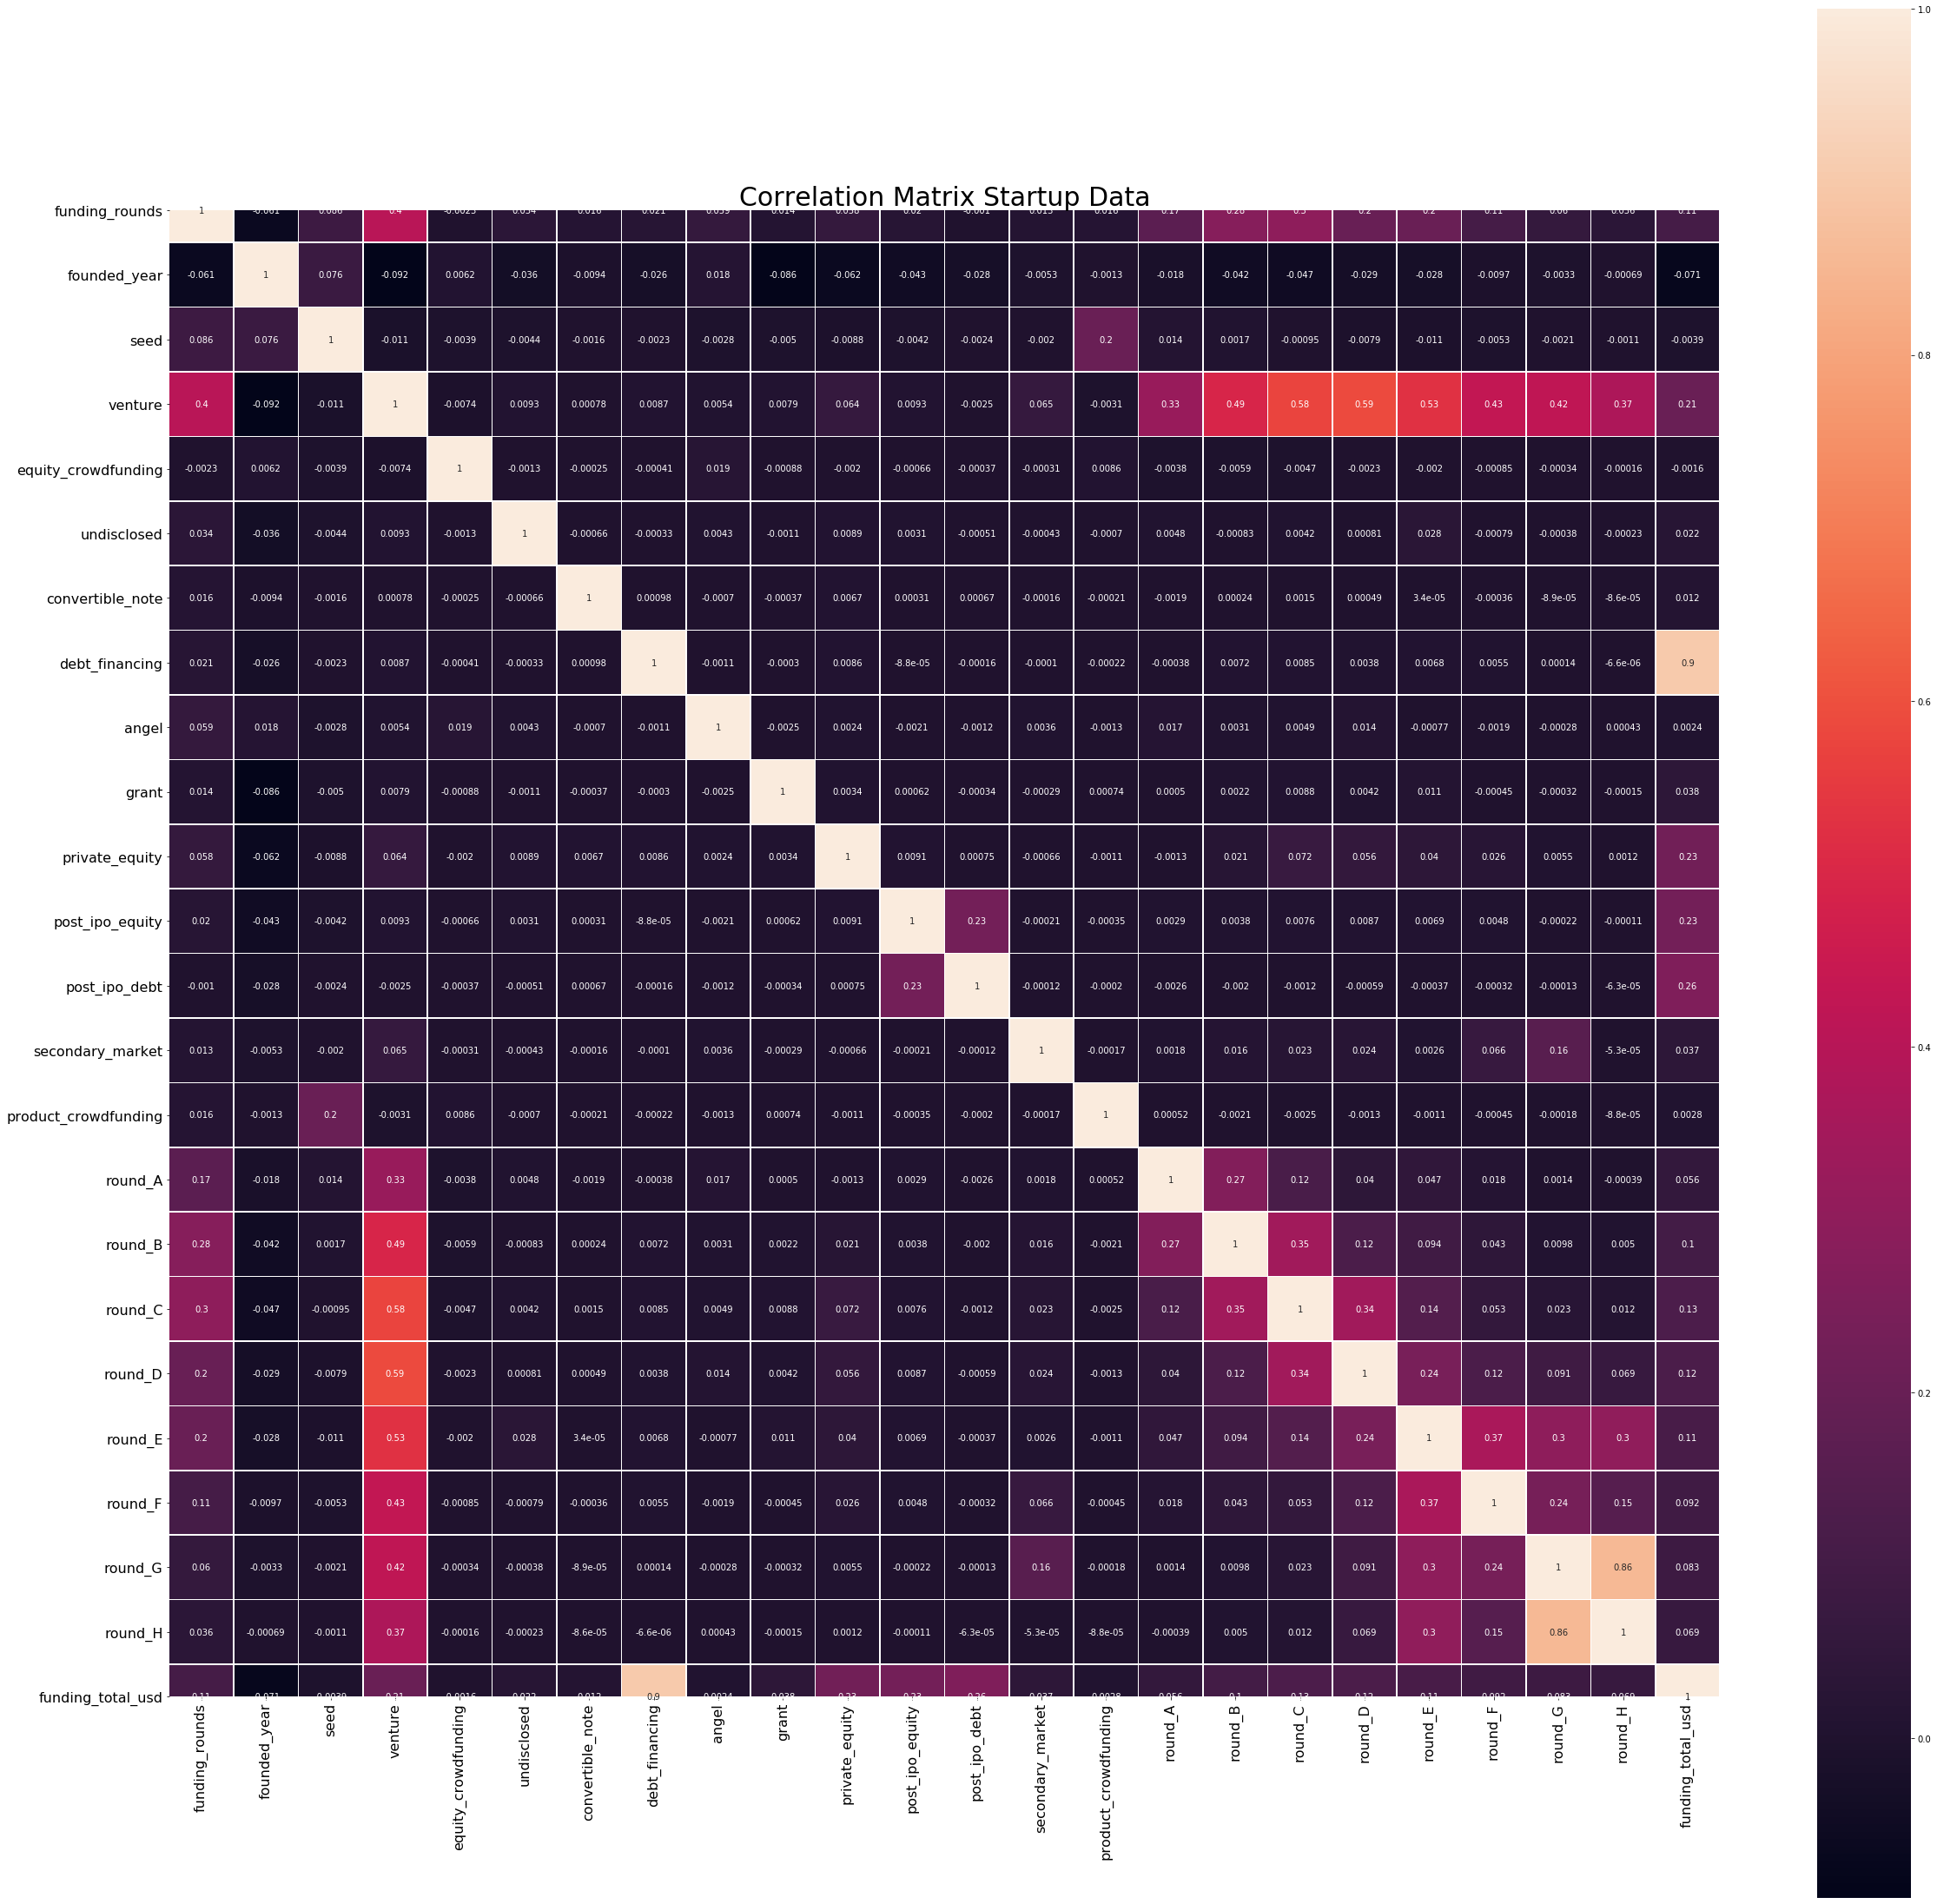

In [21]:
# Heatmap for closer look into correlation
plt.figure(figsize = (40,40))
sns.heatmap(numeric_corr, square = True, annot = True, linewidths = 0.5)
plt.title("Correlation Matrix Startup Data", fontsize = 30)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)

In [22]:
col_list = list(numeric_data.columns)
len(col_list)

24

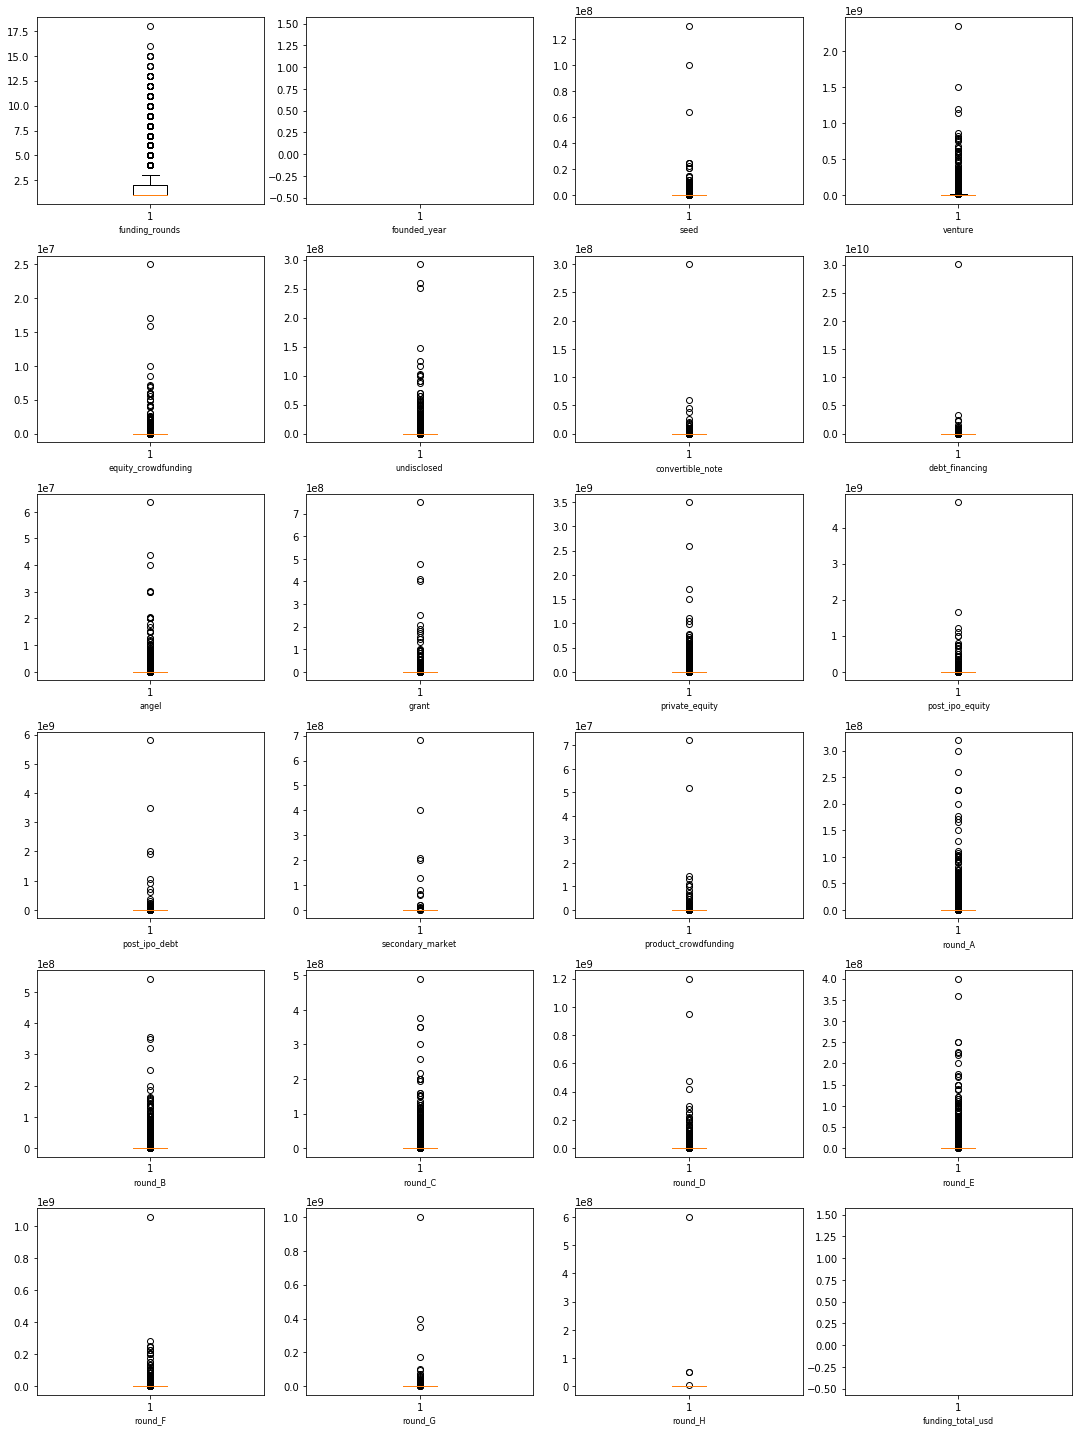

In [23]:
# plotting Boxplots to check for outliers
plt.figure(figsize = (15,20))
for index, col in enumerate(col_list):
    plt.subplot(6,4, index+1)
    plt.boxplot(numeric_data[col])
    plt.xlabel(col, fontsize = 8)
plt.tight_layout()

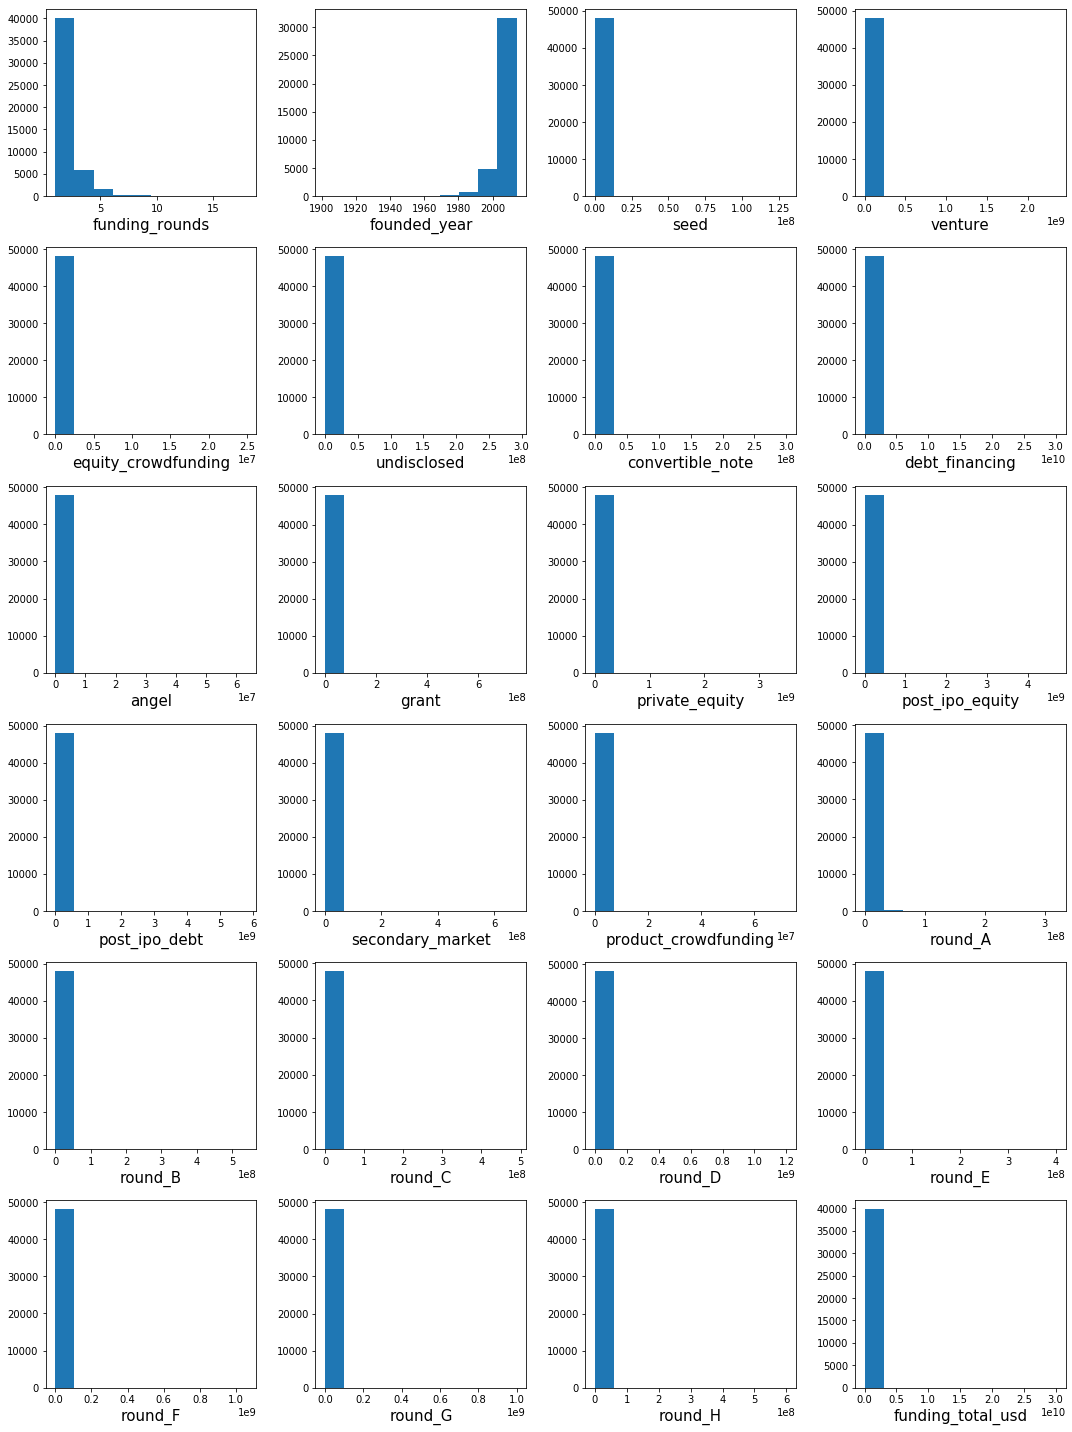

In [24]:
# Plotting Histograms for looking into normality
plt.figure(figsize = (15,20))
for index, col in enumerate(col_list):
    plt.subplot(6,4, index+1)
    plt.hist(numeric_data[col])
    plt.xlabel(col, fontsize = 15)
plt.tight_layout()

#### From the histograms above, we can see that there are a lot of zeroe's in our data, in almost all the variables

In [25]:
investments_df['status'].value_counts()

operating    41829
acquired      3692
closed        2603
Name: status, dtype: int64

(array([3.1111e+04, 0.0000e+00, 8.9900e+03, 3.9440e+03, 1.9570e+03,
        9.8800e+02, 7.9900e+02, 2.7000e+02, 5.5000e+01, 1.0000e+01]),
 array([0.        , 0.28903718, 0.57807435, 0.86711153, 1.1561487 ,
        1.44518588, 1.73422305, 2.02326023, 2.31229741, 2.60133458,
        2.89037176]),
 <a list of 10 Patch objects>)

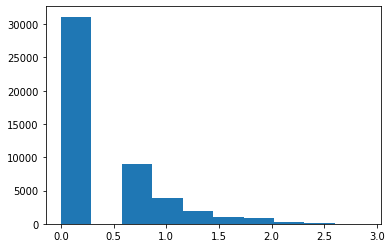

In [26]:
plt.hist(np.log(investments_df['funding_rounds']))

In [27]:
investments_df['funding_rounds'].value_counts()

1.0     31111
2.0      8990
3.0      3944
4.0      1957
5.0       988
6.0       553
7.0       246
8.0       147
9.0        81
10.0       42
11.0       35
12.0       12
13.0        8
15.0        4
14.0        4
16.0        1
18.0        1
Name: funding_rounds, dtype: int64

In [28]:
investments_df['seed'].mean()

219104.15489153023

### SEED:  In the Funding Life Cycle, once an idea has surpassed the concept stage the next stage of a new venture is known as the “Seed Stage”. During this early stage, entrepreneurs approach investors including friends, family, and angel investors to find financial support for their concept or product.

In [29]:
investments_df.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,funding_rounds,...,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H,funding_total_usd,market
0,/organization/waywire,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,acquired,USA,NY,New York City,New York,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1750000.0,News
1,/organization/tv-communications,&TV Communications,http://enjoyandtv.com,|Games|,operating,USA,CA,Los Angeles,Los Angeles,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4000000.0,Games
2,/organization/rock-your-paper,'Rock' Your Paper,http://www.rockyourpaper.org,|Publishing|Education|,operating,EST,NaN,Tallinn,Tallinn,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40000.0,Publishing
3,/organization/in-touch-network,(In)Touch Network,http://www.InTouchNetwork.com,|Electronics|Guides|Coffee|Restaurants|Music|i...,operating,GBR,NaN,London,London,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1500000.0,Electronics
4,/organization/r-ranch-and-mine,-R- Ranch and Mine,NaN,|Tourism|Entertainment|Games|,operating,USA,TX,Dallas,Fort Worth,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60000.0,Tourism


### Founded_year, founded_month, founded_at , first_funding_at, last_funding_at, founded_quarter are dates. we have 6 columns with dates

In [30]:
investments_df['venture']

0               0.0
1         4000000.0
2               0.0
3               0.0
4               0.0
            ...    
49433           0.0
49434     1587301.0
49435           0.0
49436           0.0
49437    28000000.0
Name: venture, Length: 48124, dtype: float64

In [31]:
investments_df['status'].value_counts()

operating    41829
acquired      3692
closed        2603
Name: status, dtype: int64

In [32]:
investments_df['founded_year'].min()

1902.0

In [33]:
## Founded_year, founded_month, founded_at , first_funding_at, last_funding_at, founded_quarter are dates. 
##we have 6 columns with dates

In [34]:
## Dropping the variables that have time for now
investments_df.drop(['founded_year', 'founded_month', 'founded_at', 'last_funding_at', 'founded_quarter'],
                   inplace = True, axis = 1)

In [35]:
## Imputing missing values in Funding_total_usd variable with 0
investments_df['funding_total_usd'].fillna(0, inplace = True)
investments_df['funding_total_usd'].isnull().sum()

0

In [36]:
investments_df['funding_total_usd'].mean()

13230394.749584407

In [37]:
investments_df['status'].unique()

array(['acquired', 'operating', 'closed'], dtype=object)

In [38]:
numeric_data['target_status'] = target

In [39]:
numeric_data.drop('founded_year', axis = 1, inplace = True)

In [40]:
numeric_data['funding_total_usd'].fillna(0,inplace = True)

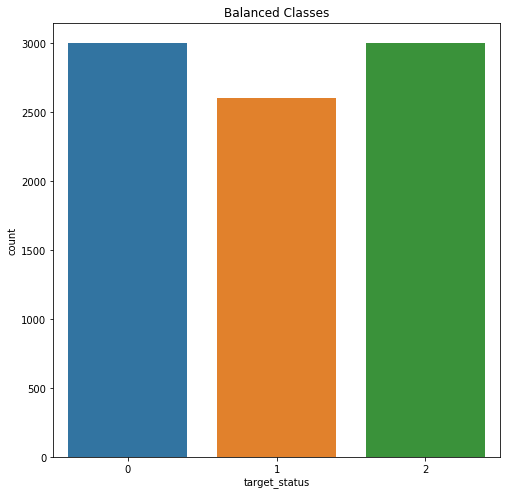

In [41]:
# Dealing with imbalanced dataset
# First shuffle the dataset
shuffled_df = numeric_data.sample(frac=1,random_state=42)
# Put all the "closed" class which is '1' in a separate dataset.
closed_df = shuffled_df.loc[shuffled_df['target_status'] == 1]
acquired_df = shuffled_df.loc[shuffled_df['target_status'] == 0].sample(n = 3000, random_state = 42)
#Randomly select 4000 observations from the operating (majority class)
operating_df = shuffled_df.loc[shuffled_df['target_status'] == 2].sample(n=3000,random_state=42)
# Concatenate above 3 dataframes again
normalized_df = pd.concat([closed_df, acquired_df, operating_df])
#plot the dataset after the undersampling
plt.figure(figsize=(8, 8))
sns.countplot('target_status', data=normalized_df)
plt.title('Balanced Classes')
plt.show()


In [42]:
X = normalized_df.loc[:, normalized_df.columns != 'target_status']
y = normalized_df[['target_status']]
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8603 entries, 20508 to 23324
Data columns (total 23 columns):
funding_rounds          8603 non-null float64
seed                    8603 non-null float64
venture                 8603 non-null float64
equity_crowdfunding     8603 non-null float64
undisclosed             8603 non-null float64
convertible_note        8603 non-null float64
debt_financing          8603 non-null float64
angel                   8603 non-null float64
grant                   8603 non-null float64
private_equity          8603 non-null float64
post_ipo_equity         8603 non-null float64
post_ipo_debt           8603 non-null float64
secondary_market        8603 non-null float64
product_crowdfunding    8603 non-null float64
round_A                 8603 non-null float64
round_B                 8603 non-null float64
round_C                 8603 non-null float64
round_D                 8603 non-null float64
round_E                 8603 non-null float64
round_F       

In [43]:
# Splitting the data with train test split with a test size of 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
## Performing Logistic Regression
lr = LogisticRegression(solver='lbfgs', penalty ='none', max_iter = 1000, random_state = 42).fit(X_train, y_train)
lr.score(X_test, y_test)

0.4312282061216583

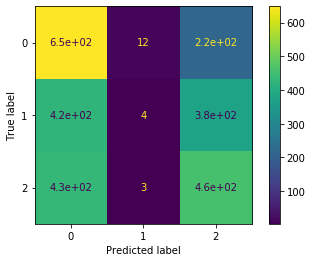

In [44]:
## Performing Logistic Regression
lr = LogisticRegression(solver='lbfgs', penalty ='none', max_iter = 1000, random_state = 42).fit(X_train, y_train)

lr.score(X_test, y_test)
from sklearn.metrics import plot_confusion_matrix
y_pred = lr.predict(X_test)
y_true = y_test
plot_confusion_matrix(lr, X_test, y_test)

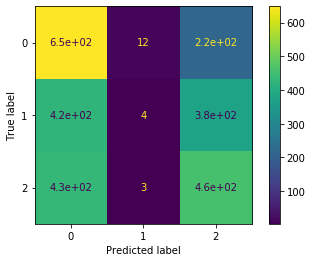

In [45]:
from sklearn.metrics import plot_confusion_matrix
y_pred = lr.predict(X_test)
y_true = y_test
plot_confusion_matrix(lr, X_test, y_test)

In [46]:
investments_df1['status'].value_counts()

operating    41829
acquired      3692
closed        2603
Name: status, dtype: int64

In [47]:
lr = LogisticRegression(solver='lbfgs', penalty ='none', max_iter = 1000, random_state = 42)
y_pred = lr.fit(X_train, y_train).predict(X_test)
y_true = y_test
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.43      0.74      0.54       877
           1       0.21      0.00      0.01       807
           2       0.44      0.51      0.47       897

    accuracy                           0.43      2581
   macro avg       0.36      0.42      0.34      2581
weighted avg       0.36      0.43      0.35      2581



In [48]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
svc = OneVsRestClassifier(LinearSVC(random_state=0)).fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)
print(classification_report(y_true, y_pred_svc))

              precision    recall  f1-score   support

           0       0.39      0.24      0.30       877
           1       0.16      0.04      0.07       807
           2       0.39      0.78      0.52       897

    accuracy                           0.37      2581
   macro avg       0.31      0.36      0.30      2581
weighted avg       0.32      0.37      0.30      2581



### Logistic regression score does not look good and we may have to try alternate methods

In [49]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

rfc = ensemble.RandomForestClassifier()
cross_val_score(rfc, X, y, cv=10)

array([0.44367015, 0.45993031, 0.44483159, 0.44418605, 0.42209302,
       0.45      , 0.46162791, 0.44069767, 0.43255814, 0.44651163])

### Our Model Failed using both Logistic Regression and RandomForestClassifier. We may have to apply logarithmic transformation to numeric_data  and perform the analysis

In [50]:
numeric_data.describe()

,funding_rounds,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,...,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H,funding_total_usd,target_status
count,48124.000000,4.812400e+04,4.812400e+04,4.812400e+04,4.812400e+04,4.812400e+04,4.812400e+04,4.812400e+04,4.812400e+04,4.812400e+04,...,4.812400e+04,4.812400e+04,4.812400e+04,4.812400e+04,4.812400e+04,4.812400e+04,4.812400e+04,4.812400e+04,4.812400e+04,48124.000000
mean,1.700586,2.191042e+05,7.598091e+06,6.255879e+03,1.273428e+05,2.353346e+04,1.909246e+06,6.605675e+04,1.626366e+05,2.083347e+06,...,1.257983e+06,1.512301e+06,1.229792e+06,7.545214e+05,3.499801e+05,1.741948e+05,5.924533e+04,1.462056e+04,1.323039e+07,1.792474
std,1.298296,1.068580e+06,2.877746e+07,2.024335e+05,2.971224e+06,1.450830e+06,1.400643e+08,6.645587e+05,5.664512e+06,3.199324e+07,...,5.577529e+06,7.544910e+06,8.086419e+06,9.944356e+06,5.472720e+06,6.362813e+06,5.323528e+06,2.753707e+06,1.554918e+08,0.563829
min,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.000000e+04,2.000000
50%,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+06,2.000000
75%,2.000000,2.500000e+04,5.000000e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.804895e+06,2.000000
max,18.000000,1.300000e+08,2.351000e+09,2.500000e+07,2.924328e+08,3.000000e+08,3.007950e+10,6.359026e+07,7.505000e+08,3.500000e+09,...,3.190000e+08,5.420000e+08,4.900000e+08,1.200000e+09,4.000000e+08,1.060000e+09,1.000000e+09,6.000000e+08,3.007950e+10,2.000000


In [51]:
## Applying Logarithm to our data
numeric_data = numeric_data.loc[:, numeric_data.columns != 'log_seed']

In [52]:
log_num_data = numeric_data.copy()
## Adding 1 to our data as most of the data has zero's 
num_col = list(numeric_data.columns[1:23])
for i in range(len(num_col)):
    log_data = np.log(numeric_data[num_col]+1)
log_data.head()

,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,...,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H,funding_total_usd
0,14.375127,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.375127
1,0.000000,15.201805,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.201805
2,10.596660,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.596660
3,14.220976,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.220976
4,0.000000,0.000000,11.002117,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.002117


In [53]:
## Adding 1 to our data as most of the data has zero's 
num_col = list(numeric_data.columns[1:23])
for i in range(len(num_col)):
    log_data = np.log(numeric_data[num_col]+1)
log_data.head()

,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,...,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H,funding_total_usd
0,14.375127,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.375127
1,0.000000,15.201805,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.201805
2,10.596660,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.596660
3,14.220976,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.220976
4,0.000000,0.000000,11.002117,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.002117


In [54]:
log_data['funding_rounds'] = numeric_data['funding_rounds']
log_data['target_status'] = numeric_data['target_status']

In [55]:
# Dealing with imbalanced dataset
# First shuffle the dataset
shuffled1_df = log_data.sample(frac=1,random_state=4)
# Put all the "closed" class which is '1' in a separate dataset.
closed1_df = shuffled1_df.loc[shuffled1_df['target_status'] == 1]
acquired1_df = shuffled1_df.loc[shuffled1_df['target_status'] == 0].sample(n = 3000, random_state = 42)
#Randomly select 4000 observations from the operating (majority class)
operating1_df = shuffled1_df.loc[shuffled1_df['target_status'] == 2].sample(n=3000,random_state=42)
normalized1_df = pd.concat([closed1_df, acquired1_df, operating1_df])

In [ ]:
# Concatenate above 3 dataframes again
normalized1_df = pd.concat([closed1_df, acquired1_df, operating1_df])
#plot the dataset after the undersampling
plt.figure(figsize=(8, 8))
sns.countplot('target_status', data=normalized1_df)
plt.title('Balanced Classes')
plt.show()

In [56]:
col_list1 = list(log_data.columns)

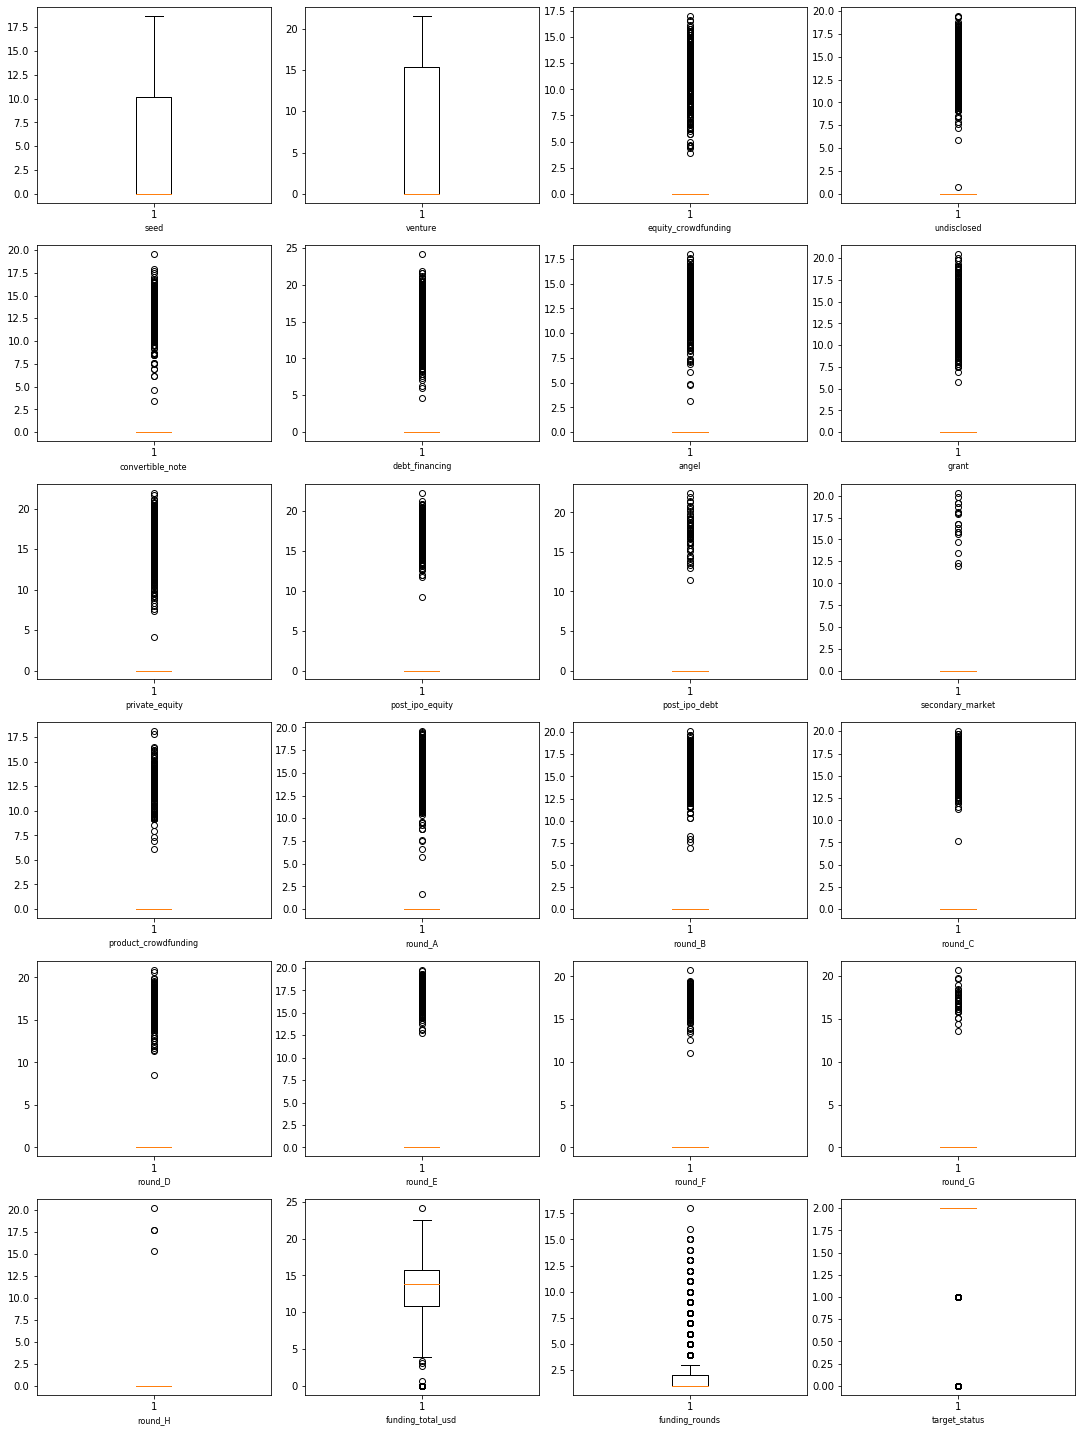

In [57]:
## Performing Boxplots for log transformed data
plt.figure(figsize = (15,20))
for index, col in enumerate(col_list1):
    plt.subplot(6,4, index+1)
    plt.boxplot(log_data[col])
    plt.xlabel(col, fontsize = 8)
plt.tight_layout()

In [58]:
numeric_data.columns[1:23]

Index(['seed', 'venture', 'equity_crowdfunding', 'undisclosed',
       'convertible_note', 'debt_financing', 'angel', 'grant',
       'private_equity', 'post_ipo_equity', 'post_ipo_debt',
       'secondary_market', 'product_crowdfunding', 'round_A', 'round_B',
       'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H',
       'funding_total_usd'],
      dtype='object')

In [59]:
X_log = normalized1_df.loc[:, normalized1_df.columns != 'target_status']
y_log = normalized1_df[['target_status']]
X_trainl, X_testl, y_trainl, y_testl = train_test_split(X_log, y_log, test_size = 0.3, random_state = 42)
log_lr = LogisticRegression(solver='lbfgs', penalty ='none', max_iter = 1000, random_state = 42)
log_lr.fit(X_trainl, y_trainl)
log_lr.score(X_testl, y_testl)

0.45137543587756684

In [60]:
X_trainl, X_testl, y_trainl, y_testl = train_test_split(X_log, y_log, test_size = 0.3, random_state = 42)

In [61]:
log_lr = LogisticRegression(solver='lbfgs', penalty ='none', max_iter = 1000, random_state = 42)
log_lr.fit(X_trainl, y_trainl)

log_lr.score(X_testl, y_testl)

0.45137543587756684

In [62]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

rfc_log = ensemble.RandomForestClassifier()
cross_val_score(rfc_log, X_log, y_log, cv=10)

array([0.45993031, 0.43902439, 0.44715447, 0.41627907, 0.43953488,
       0.46860465, 0.43372093, 0.44883721, 0.44767442, 0.42790698])

### Applying logarithmic transformation did not change our model performance

In [63]:
log_data.describe()

,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,...,round_B,round_C,round_D,round_E,round_F,round_G,round_H,funding_total_usd,funding_rounds,target_status
count,48124.000000,48124.000000,48124.000000,48124.000000,48124.000000,48124.000000,48124.000000,48124.000000,48124.000000,48124.000000,...,48124.000000,48124.000000,48124.000000,48124.000000,48124.000000,48124.000000,48124.000000,48124.000000,48124.000000,48124.000000
mean,3.485757,7.270287,0.119844,0.266329,0.146007,1.213561,0.831161,0.292615,0.453161,0.089570,...,1.776754,0.956432,0.440348,0.179184,0.060049,0.012076,0.001475,11.873468,1.700586,1.792474
std,5.671018,7.766936,1.176106,1.924378,1.379769,4.008415,3.198170,1.975749,2.726844,1.232887,...,5.032805,3.851723,2.674167,1.729416,1.008856,0.455880,0.162556,5.832127,1.298296,0.563829
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.819798,1.000000,2.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.815512,1.000000,2.000000
75%,10.126671,15.424949,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.733153,2.000000,2.000000
max,18.683045,21.578107,17.034386,19.493746,19.519293,24.127110,17.967971,20.436250,21.976029,22.270828,...,20.110777,20.009916,20.905587,19.806975,20.781535,20.723266,20.212440,24.127110,18.000000,2.000000


In [64]:
from scipy.stats.mstats import winsorize
wins_crowdfunding = winsorize(log_data['equity_crowdfunding'], (0,0.1))

{'whiskers': [<matplotlib.lines.Line2D at 0x1a231cef28>,
 'caps': [<matplotlib.lines.Line2D at 0x1a2c5903c8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a231ce668>],
 'medians': [<matplotlib.lines.Line2D at 0x1a2c590a58>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a2c590da0>],
 'means': []}

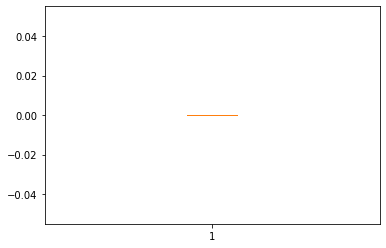

In [65]:
plt.boxplot(wins_crowdfunding)

In [66]:
max(wins_crowdfunding)

0.0

#### Winsorizing our variables may lead to zeroes in all the data and it will not work

In [67]:
# Applying square root transformation to our data
num_col = list(numeric_data.columns[1:23])
for i in range(len(num_col)):
    sqrt_data = np.sqrt(numeric_data[num_col])
sqrt_data.head()

,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,...,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H,funding_total_usd
0,1322.875656,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1322.875656
1,0.000000,2000.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2000.000000
2,200.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,200.000000
3,1224.744871,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1224.744871
4,0.000000,0.0,244.948974,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,244.948974


In [68]:
sqrt_data['funding_rounds'] = numeric_data['funding_rounds']
sqrt_data['target_status'] = numeric_data['target_status']

In [69]:
# Dealing with imbalanced dataset
# First shuffle the dataset
shuffled_df1 = sqrt_data.sample(frac=1,random_state=4)
# Put all the "closed" class which is '1' in a separate dataset.
closed_df1 = shuffled_df1.loc[shuffled_df1['target_status'] == 1]
acquired_df1 = shuffled_df1.loc[shuffled_df1['target_status'] == 0].sample(n = 3000, random_state = 42)
#Randomly select 4000 observations from the operating (majority class)
operating_df1 = shuffled_df1.loc[shuffled_df1['target_status'] == 2].sample(n=3000,random_state=42)

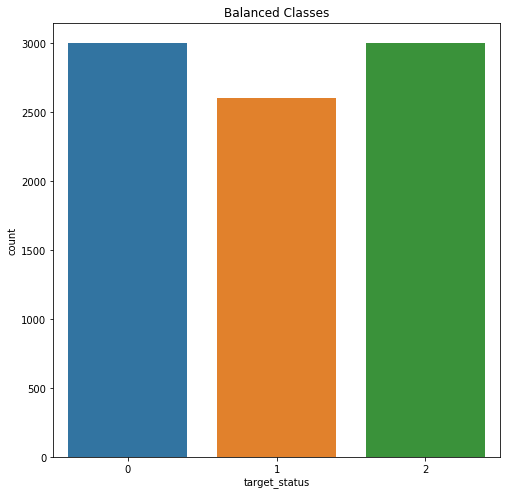

In [70]:
# Concatenate above 3 dataframes again
normalized_df1 = pd.concat([closed_df1, acquired_df1, operating_df1])
#plot the dataset after the undersampling
plt.figure(figsize=(8, 8))
sns.countplot('target_status', data=normalized_df1)
plt.title('Balanced Classes')
plt.show()

In [71]:
X_sqrt = normalized_df1.loc[:, normalized_df1.columns != 'target_status']
y_sqrt = normalized_df1[['target_status']]

In [72]:
X_trains, X_tests, y_trains, y_tests = train_test_split(X_sqrt, y_sqrt, test_size = 0.3, random_state = 42)

In [73]:
lr_sqrt = LogisticRegression(solver='lbfgs', penalty ='none', max_iter = 1000, random_state = 42)
lr_sqrt.fit(X_trains, y_trains)

lr_sqrt.score(X_tests, y_tests)

0.4502130956993413

In [74]:
rfc_sqrt = ensemble.RandomForestClassifier()
cross_val_score(rfc_sqrt, X_sqrt, y_sqrt, cv=5)

array([0.44450901, 0.44334689, 0.4514817 , 0.4377907 , 0.43430233])

### Square root transformation did not work, we may have to add few more variables to our data

In [75]:
in_df = in_df1.iloc[0:49438]

In [76]:
categorical_data['first_funding_at'] = in_df['first_funding_at']

In [77]:
categorical_data['last_funding_at'] = in_df['last_funding_at']

In [78]:
categorical_data['founded_month'] = in_df['founded_month']

In [79]:
categorical_data['founded_quarter'] = in_df['founded_quarter']

In [80]:
categorical_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48124 entries, 0 to 49437
Data columns (total 15 columns):
permalink           48124 non-null object
name                48123 non-null object
homepage_url        44747 non-null object
category_list       44542 non-null object
status              48124 non-null object
country_code        43057 non-null object
state_code          29550 non-null object
region              43057 non-null object
city                42267 non-null object
founded_at          37636 non-null object
founded_month       37564 non-null object
founded_quarter     37564 non-null object
first_funding_at    48124 non-null object
last_funding_at     48124 non-null object
market              44535 non-null object
dtypes: object(15)
memory usage: 5.9+ MB


In [81]:
# Converting date variables to datetime from categorical
categorical_data['founded_month'] = pd.to_datetime(categorical_data['founded_month'], errors = 'coerce')
categorical_data['founded_quarter'] = pd.to_datetime(categorical_data['founded_quarter'], errors = 'coerce')
categorical_data['first_funding_at'] = pd.to_datetime(categorical_data['first_funding_at'], errors = 'coerce')
categorical_data['last_funding_at'] = pd.to_datetime(categorical_data['last_funding_at'], errors = 'coerce')

In [82]:
categorical_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48124 entries, 0 to 49437
Data columns (total 15 columns):
permalink           48124 non-null object
name                48123 non-null object
homepage_url        44747 non-null object
category_list       44542 non-null object
status              48124 non-null object
country_code        43057 non-null object
state_code          29550 non-null object
region              43057 non-null object
city                42267 non-null object
founded_at          37636 non-null object
founded_month       37564 non-null datetime64[ns]
founded_quarter     37564 non-null datetime64[ns]
first_funding_at    48114 non-null datetime64[ns]
last_funding_at     48118 non-null datetime64[ns]
market              44535 non-null object
dtypes: datetime64[ns](4), object(11)
memory usage: 5.9+ MB


In [83]:
# Filling missing values in market variable with missing
categorical_data['market'] = categorical_data['market'].fillna('missing')

In [84]:
#Creating a new variable duration1
duration1 = categorical_data['last_funding_at'] - categorical_data['first_funding_at']
numeric_data['duration1']  = duration1.dt.days

In [85]:
numeric_data['duration1']  = duration1.dt.days

In [86]:
categorical_data['market'].nunique()

753

In [87]:
cat_market = pd.get_dummies(categorical_data['market'], prefix = 'market', drop_first = True)
cat_market

,market_ 3D Printing,market_ 3D Technology,market_ Accounting,market_ Ad Targeting,market_ Advanced Materials,market_ Adventure Travel,market_ Advertising,market_ Advertising Exchanges,market_ Advertising Networks,market_ Advertising Platforms,...,market_ Women,market_ World Domination,market_ Writers,market_ Young Adults,market_ iOS,market_ iPad,market_ iPhone,market_ iPod Touch,market_ mHealth,market_missing
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49433,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49434,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49435,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49436,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [88]:
investments_df['status'].value_counts()

operating    41829
acquired      3692
closed        2603
Name: status, dtype: int64

In [89]:
investments_df.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,funding_rounds,...,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H,funding_total_usd,market
0,/organization/waywire,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,acquired,USA,NY,New York City,New York,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1750000.0,News
1,/organization/tv-communications,&TV Communications,http://enjoyandtv.com,|Games|,operating,USA,CA,Los Angeles,Los Angeles,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4000000.0,Games
2,/organization/rock-your-paper,'Rock' Your Paper,http://www.rockyourpaper.org,|Publishing|Education|,operating,EST,NaN,Tallinn,Tallinn,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40000.0,Publishing
3,/organization/in-touch-network,(In)Touch Network,http://www.InTouchNetwork.com,|Electronics|Guides|Coffee|Restaurants|Music|i...,operating,GBR,NaN,London,London,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1500000.0,Electronics
4,/organization/r-ranch-and-mine,-R- Ranch and Mine,NaN,|Tourism|Entertainment|Games|,operating,USA,TX,Dallas,Fort Worth,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60000.0,Tourism


In [90]:
numeric_data.head()

,funding_rounds,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,...,round_B,round_C,round_D,round_E,round_F,round_G,round_H,funding_total_usd,target_status,duration1
0,1.0,1750000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1750000.0,0,0.0
1,2.0,0.0,4000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4000000.0,2,111.0
2,1.0,40000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40000.0,2,0.0
3,1.0,1500000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1500000.0,2,0.0
4,2.0,0.0,0.0,60000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60000.0,2,40.0


In [91]:
normalized_df.head()

,funding_rounds,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,...,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H,funding_total_usd,target_status
20508,2.0,0.0,457000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,457000.0,1
22365,2.0,0.0,7000000.0,0.0,0.0,0.0,2500000.0,0.0,0.0,0.0,...,7000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9500000.0,1
45609,1.0,0.0,4000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4000000.0,1
1004,2.0,0.0,3900600.0,0.0,0.0,260000.0,0.0,0.0,0.0,0.0,...,3900600.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4160600.0,1
18720,1.0,500000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,500000.0,1


In [92]:
X_new = normalized_df.drop('target_status', axis =1)
X_new.head()

,funding_rounds,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,...,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H,funding_total_usd
20508,2.0,0.0,457000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,457000.0
22365,2.0,0.0,7000000.0,0.0,0.0,0.0,2500000.0,0.0,0.0,0.0,...,0.0,7000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9500000.0
45609,1.0,0.0,4000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4000000.0
1004,2.0,0.0,3900600.0,0.0,0.0,260000.0,0.0,0.0,0.0,0.0,...,0.0,3900600.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4160600.0
18720,1.0,500000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,500000.0


In [93]:
y_new = normalized_df['target_status']

In [94]:
from sklearn.multioutput import MultiOutputClassifier
forest = ensemble.RandomForestClassifier(random_state=1)
multi_target_forest = MultiOutputClassifier(forest, n_jobs=1)
cross_val_score(multi_target_forest, X_new, y_new, cv=5)

array([nan, nan, nan, nan, nan])

In [95]:
normalized_df.describe()

,funding_rounds,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,...,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H,funding_total_usd,target_status
count,8603.000000,8.603000e+03,8.603000e+03,8.603000e+03,8.603000e+03,8.603000e+03,8.603000e+03,8.603000e+03,8.603000e+03,8.603000e+03,...,8.603000e+03,8.603000e+03,8.603000e+03,8.603000e+03,8.603000e+03,8.603000e+03,8.603000e+03,8603.0,8.603000e+03,8603.000000
mean,1.729513,1.888570e+05,8.659891e+06,2.783432e+03,1.191068e+05,1.047783e+04,1.538727e+06,6.632734e+04,5.222151e+04,1.836144e+06,...,1.483582e+06,2.016784e+06,1.499966e+06,8.795807e+05,3.440055e+05,1.228667e+05,1.923748e+04,0.0,1.363972e+07,1.000000
std,1.279185,7.706407e+05,2.331972e+07,8.556588e+04,2.462411e+06,2.863468e+05,2.601365e+07,6.383854e+05,1.456100e+06,2.380798e+07,...,6.314940e+06,8.082368e+06,6.986503e+06,7.221173e+06,4.393836e+06,3.704659e+06,9.413186e+05,0.0,8.004965e+07,0.835172
min,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000
25%,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,1.000000e+05,0.000000
50%,1.000000,0.000000e+00,4.800000e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,1.550000e+06,1.000000
75%,2.000000,0.000000e+00,7.837306e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,1.000000e+07,2.000000
max,15.000000,2.500000e+07,7.750000e+08,5.500000e+06,1.470000e+08,1.847242e+07,1.200000e+09,4.000000e+07,9.980000e+07,1.107000e+09,...,2.600000e+08,3.500000e+08,2.000000e+08,3.000000e+08,2.200000e+08,2.860000e+08,6.300000e+07,0.0,5.700000e+09,2.000000


In [96]:
lr = LogisticRegression(solver='lbfgs', penalty ='none', max_iter = 1000, random_state = 42)
y_pred = lr.fit(X_train, y_train).predict(X_test)
y_true = y_test
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.43      0.74      0.54       877
           1       0.21      0.00      0.01       807
           2       0.44      0.51      0.47       897

    accuracy                           0.43      2581
   macro avg       0.36      0.42      0.34      2581
weighted avg       0.36      0.43      0.35      2581



In [97]:
numeric_data['duration1'] = duration1.dt.days

In [98]:
numeric_data['duration1'].fillna(0, inplace = True)

In [99]:
numeric_data['duration1'].mean()

314.72261241792035

In [100]:
class_data = numeric_data.copy()

In [101]:
col_list1 = list(class_data.columns[0:23])

In [102]:
## Converting all the columns with value above 0 to 1 
for col in class_data[col_list1]:
    class_data.loc[class_data.loc[:, col] > 0, col] = 1

In [103]:
class_data.head()

,funding_rounds,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,...,round_B,round_C,round_D,round_E,round_F,round_G,round_H,funding_total_usd,target_status,duration1
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2,111.0
2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2,0.0
3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2,0.0
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2,40.0


In [104]:
# Dealing with imbalanced dataset
# First shuffle the dataset
shuffled_df = class_data.sample(frac=1,random_state=42)
# Put all the "closed" class which is '1' in a separate dataset.
closed_df = shuffled_df.loc[shuffled_df['target_status'] == 1]
acquired_df = shuffled_df.loc[shuffled_df['target_status'] == 0].sample(n = 3000, random_state = 42)
#Randomly select 4000 observations from the operating (majority class)
operating_df = shuffled_df.loc[shuffled_df['target_status'] == 2].sample(n=3000,random_state=42)

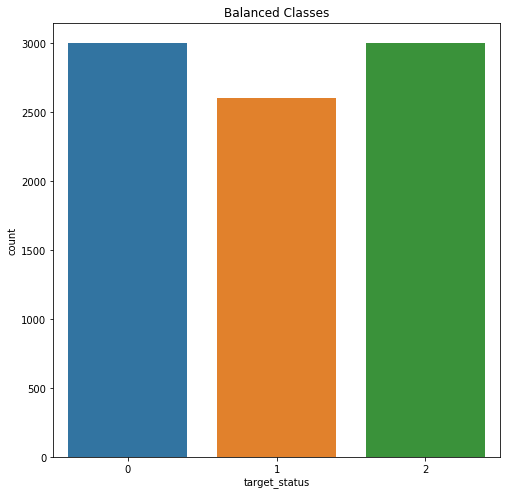

In [105]:
# Concatenate above 3 dataframes again
normalized_df = pd.concat([closed_df, acquired_df, operating_df])
#plot the dataset after the undersampling
plt.figure(figsize=(8, 8))
sns.countplot('target_status', data=normalized_df)
plt.title('Balanced Classes')
plt.show()

In [106]:
X_class = normalized_df.drop('target_status', axis = 1)

In [107]:
y_class = normalized_df['target_status']
X_train, X_test, y_train, y_test = train_test_split(X_class, y_class, test_size = 0.3, random_state = 42)

In [108]:
lr = LogisticRegression(solver='lbfgs', penalty ='none', max_iter = 1000, random_state = 42)
y_pred = lr.fit(X_train, y_train).predict(X_test)
y_true = y_test

In [109]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.47      0.66      0.54       877
           1       0.47      0.13      0.21       807
           2       0.44      0.54      0.48       897

    accuracy                           0.45      2581
   macro avg       0.46      0.44      0.41      2581
weighted avg       0.46      0.45      0.42      2581



### 2 - "Operating"
### 1 - "Closed"
### 0 - "Acquired"

In [111]:
num_data = numeric_data.copy()

In [112]:
num_data['target_status1'] = num_data['target_status'].replace(0,2)

In [113]:
num_data['target_status1']  =  num_data['target_status'].replace(1,0)
num_data['target_status1']  =  num_data['target_status'].replace(2,1)

In [114]:
num_data['target_status1'].value_counts()

1    44432
0     3692
Name: target_status1, dtype: int64

In [115]:
## added all acquired to operating to perform Binary classifier
num_data['target_status'].value_counts()

2    41829
0     3692
1     2603
Name: target_status, dtype: int64

In [116]:
## Balancing the dataset
# Dealing with imbalanced dataset
# First shuffle the dataset
shuffled_df = num_data.sample(frac=1,random_state=42)
# Put all the "closed" class which is '1' in a separate dataset.
closed_df = shuffled_df.loc[shuffled_df['target_status1'] == 0]
#Randomly select 4000 observations from the operating (majority class)
operating_df = shuffled_df.loc[shuffled_df['target_status1'] == 1].sample(n=3000,random_state=42)

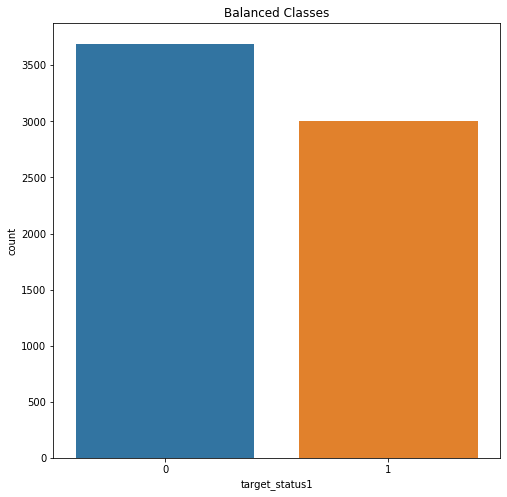

In [117]:
# Concatenate above 3 dataframes again
Binary_df = pd.concat([closed_df, operating_df])
#plot the dataset after the undersampling
plt.figure(figsize=(8, 8))
sns.countplot('target_status1', data=Binary_df)
plt.title('Balanced Classes')
plt.show()

In [118]:
X_binary = Binary_df.drop('target_status1', axis = 1)
y_binary = Binary_df['target_status1']
X_trainb, X_testb, y_trainb, y_testb = train_test_split(X_binary, y_binary, test_size = 0.3, random_state = 42)

In [119]:
lrb = LogisticRegression(solver='lbfgs', penalty ='none', max_iter = 1000, random_state = 42)
y_predb = lrb.fit(X_trainb, y_trainb).predict(X_testb)
y_trueb = y_testb

In [120]:
lrb.score(X_testb, y_testb)

0.6862549800796812

In [121]:
report = classification_report(y_testb, y_predb, target_names=['CLOSED', 'OPERATING'])
print(report)

              precision    recall  f1-score   support

      CLOSED       0.67      0.87      0.76      1121
   OPERATING       0.73      0.45      0.56       887

    accuracy                           0.69      2008
   macro avg       0.70      0.66      0.66      2008
weighted avg       0.70      0.69      0.67      2008



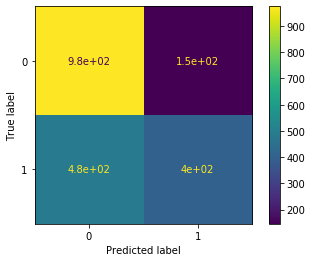

In [122]:
y_predb = lrb.predict(X_testb)
y_trueb = y_testb
plot_confusion_matrix(lrb, X_testb, y_testb)

In [123]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_testb, y_predb)
TP = confusion[1,1]
FP = confusion[0,1]
FN = confusion[1,0]
TN = confusion[0,0]
print(TP,TN, FP, FN)

403 975 146 484


### Performing a Binary classification by scaling the features

In [124]:
y_pred_prob = lrb.predict_proba(X_testb)[:,1]

In [125]:
X_binary.drop('target_status', axis =1, inplace = True)

In [126]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Xs = scaler.fit_transform(X_binary)
lr_scalar = LogisticRegression(solver='lbfgs', penalty ='none', max_iter = 1000, random_state = 42)
cross_val_score(lr_scalar, Xs, y_binary, cv=10).mean()

0.6377790420096825

In [127]:
X_trainbs, X_testbs, y_trainbs, y_testbs = train_test_split(Xs, y_binary, test_size = 0.3,
                                                            random_state = 42)

In [128]:
lrbs = LogisticRegression(solver='lbfgs', penalty ='none', max_iter = 1000, random_state = 42)
lrbs.fit(X_trainbs, y_trainbs)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [129]:
lrbs.score(X_testbs, y_testbs)

0.647410358565737

In [130]:
y_predbs = lrbs.predict(X_testbs)

In [131]:
y_truebs = y_testbs

In [132]:
print(classification_report(y_truebs, y_testbs))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1121
           1       1.00      1.00      1.00       887

    accuracy                           1.00      2008
   macro avg       1.00      1.00      1.00      2008
weighted avg       1.00      1.00      1.00      2008



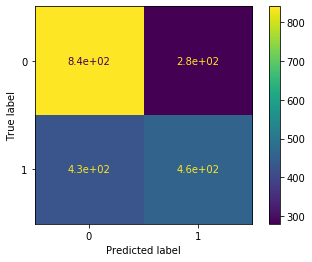

In [133]:
plot_confusion_matrix(lrbs, X_testbs, y_testbs)

In [134]:
confusions = confusion_matrix(y_testbs, y_predbs)
TP = confusions[1,1]
FP = confusions[0,1]
FN = confusions[1,0]
TN = confusions[0,0]
print(TP,TN, FP, FN)

459 841 280 428


In [135]:
y_predict_probs = lrbs.predict_proba(X_testbs)[:,1]
y_predict_probs

array([0.37951325, 0.47391264, 0.49769377, ..., 0.49441543, 0.48153378,
       0.50148756])

In [136]:
y_predict_probs.mean()

0.44839703942558085

Text(0, 0.5, 'Frequency')

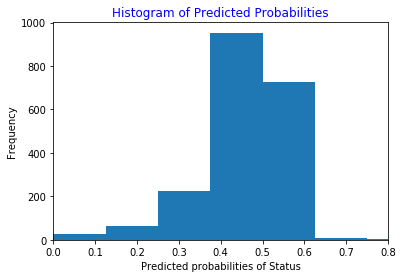

In [137]:
plt.hist(y_predict_probs, bins = 8)
plt.xlim(0, 0.8)
plt.title("Histogram of Predicted Probabilities", color = 'blue')
plt.xlabel("Predicted probabilities of Status")
plt.ylabel("Frequency")

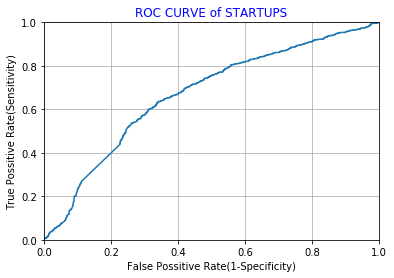

In [138]:
fpr,tpr, thresholds = roc_curve(y_testbs, y_predict_probs)
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title("ROC CURVE of STARTUPS", color = 'blue')
plt.xlabel('False Possitive Rate(1-Specificity)')
plt.ylabel('True Possitive Rate(Sensitivity)')
plt.grid(True)

#### Threshold of 0.5 is used by default for Binary Problems, to convert predicted probabilities into class predictions. Threshold can be adjusted to increase sensitivity or specificity.

In [139]:
def evaluate_threshold(threshold):
    print("Sensitivity: ", tpr[threshold > thresholds][-1])
    print("Specificity: ",1-fpr[threshold > thresholds][-1])

In [140]:
evaluate_threshold(0.5)

Sensitivity:  1.0
Specificity:  0.0


In [141]:
len(y_predict_probs[y_predict_probs > 0.5])

739

## The data is really sparse. After applying various methods, mulitclassification did not give good results even with logarithmic and squareroot transformations. Also converted the problem into a binary classification by combining acquired and operating into one category, and our model performed little better than multiclassification. The DummyClassification score is 0.77 which was much better than all our models. It appears that this problem needs more advanced techniques to solve.

F1 score :  The contribution of Precision and recall are equal

In [142]:
operating_by_country = categorical_data[categorical_data.status == 'operating'].country_code.value_counts(normalize = True)*100
operating_by_country

USA    64.148168
GBR     6.146028
CAN     3.161273
CHN     3.123830
DEU     2.195774
         ...    
JAM     0.002675
TTO     0.002675
MUS     0.002675
MKD     0.002675
CIV     0.002675
Name: country_code, Length: 112, dtype: float64

### We can see that 64% of the startups in the US are operating, 6% in GBR, 3% in Canada and China

In [143]:
operating_by_market = categorical_data[categorical_data.status == 'operating'].market.value_counts(normalize = 
                                                                                                   True)*100
operating_by_market

 Software                          9.106123
missing                            8.027923
 Biotechnology                     7.807980
 Mobile                            3.829879
 E-Commerce                        3.707954
                                     ...   
 Reading Apps                      0.002391
 Racing                            0.002391
 Radical Breakthrough Startups     0.002391
 Performing Arts                   0.002391
 Neuroscience                      0.002391
Name: market, Length: 749, dtype: float64

In [144]:
operating_by_market[operating_by_market < 1]

 Security                          0.949102
 Real Estate                       0.889335
 Fashion                           0.884554
 Semiconductors                    0.884554
 Web Hosting                       0.774582
                                     ...   
 Reading Apps                      0.002391
 Racing                            0.002391
 Radical Breakthrough Startups     0.002391
 Performing Arts                   0.002391
 Neuroscience                      0.002391
Name: market, Length: 729, dtype: float64

In [145]:
count_table = pd.crosstab(categorical_data['country_code'], categorical_data['status'])
print(stats.chisquare(count_table, axis = None))

Power_divergenceResult(statistic=4737804.662099077, pvalue=0.0)


In [146]:
count_table1 = pd.crosstab(categorical_data['market'], categorical_data['status'])
print(stats.chisquare(count_table1, axis = None))

Power_divergenceResult(statistic=2518608.6552240043, pvalue=0.0)


#### It appears that both the market and country_code variables have significant association with status variable, which means the status variable is dependant on country and the type of market

In [147]:
categorical_data.groupby('country_code').status.value_counts(normalize = True)

country_code  status   
ALB           operating    1.000000
ARE           operating    0.893939
              acquired     0.060606
              closed       0.045455
ARG           operating    0.913669
                             ...   
VNM           closed       0.047619
ZAF           operating    0.884615
              closed       0.076923
              acquired     0.038462
ZWE           operating    1.000000
Name: status, Length: 220, dtype: float64

In [148]:
num_data['market'] = categorical_data['market']
num_data['country_code'] = categorical_data['country_code']
num_data['country_code'] = num_data['country_code'].fillna('missing')
num_data['market'] = num_data['market'].str.replace(' ', '')
num_data['market'] = num_data['market'].str.replace('-', '')
num_data['market'].nunique()

752

In [149]:
num_data['country_code'] = num_data['country_code'].fillna('missing')

In [150]:
num_data['market'] = num_data['market'].str.replace(' ', '')
num_data['market'] = num_data['market'].str.replace('-', '')

In [151]:
num_data['market'].nunique()

752

In [152]:
num_data['market'].value_counts().sort_values(ascending = False).head(50)

Software              4527
missing               3589
Biotechnology         3588
Mobile                1944
ECommerce             1739
CuratedWeb            1630
EnterpriseSoftware    1256
HealthCare            1185
CleanTechnology       1164
Games                 1161
Hardware+Software     1065
Advertising           1026
HealthandWellness      906
SocialMedia            861
Education              848
Finance                837
Manufacturing          728
Analytics              607
Security               512
Semiconductors         497
Consulting             478
Hospitality            453
WebHosting             439
Fashion                393
RealEstate             388
News                   374
Travel                 343
Messaging              293
Music                  288
Search                 282
Medical                259
SaaS                   259
Sports                 252
Technology             251
Apps                   246
Internet               243
Photography            240
E

In [153]:
num_data['country_code'].value_counts().sort_values(ascending = False).head(50)

USA        28233
missing     5067
GBR         2595
CAN         1351
CHN         1229
DEU          939
FRA          847
IND          832
ISR          678
ESP          527
SWE          307
ITA          305
IRL          303
AUS          301
SGP          292
NLD          290
CHL          279
JPN          275
BRA          258
KOR          246
CHE          215
DNK          209
RUS          206
FIN          190
BEL          146
ARG          139
HKG          123
TUR          122
AUT          102
NOR           97
POL           90
MEX           71
PRT           69
BGR           68
ARE           66
NZL           59
ZAF           52
IDN           51
MYS           48
CZE           47
EST           43
HUN           42
UKR           41
TWN           41
THA           38
COL           33
PHL           32
GRC           31
LTU           31
NGA           28
Name: country_code, dtype: int64

In [154]:
## Choosing top 50 columns in Market variable
mtop_50 = [x for x in num_data.market.value_counts().sort_values(ascending = False).head(50).index]

In [155]:
## Choosing top 50 columns in country_code variable
ctop_50 = [x for x in num_data.country_code.value_counts().sort_values(ascending = False).head(50).index]

In [156]:
for label in mtop_50:
    num_data[label] = np.where(num_data['market'] == label,1,0)
new_data = num_data[mtop_50]

In [157]:
new_data = num_data[mtop_50]

In [158]:
for label in ctop_50:
    num_data[label] = np.where(num_data['country_code'] == label,1,0)
new_data1 = num_data[ctop_50]

In [159]:
new_data1 = num_data[ctop_50]

In [160]:
features = pd.concat([new_data1, new_data], axis = 1)

In [161]:
len(num_data.columns)

127

In [162]:
# Dealing with imbalanced dataset
# First shuffle the dataset
shuffled_df3 = num_data.sample(frac=1,random_state=42)
# Put all the "closed" class which is '1' in a separate dataset.
closed_df3 = shuffled_df3.loc[shuffled_df3['target_status1'] == 0]
#Randomly select 4000 observations from the operating (majority class)
operating_df3 = shuffled_df3.loc[shuffled_df3['target_status1'] == 1].sample(n=3000,random_state=42)
normalized_dfe = pd.concat([closed_df3, operating_df3])

In [163]:
normalized_dfe.drop(['market', 'country_code'], axis =1, inplace = True)

In [164]:
X3 = normalized_dfe.drop('target_status1', axis = 1)
y3 = normalized_dfe['target_status1']

In [165]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3,test_size = 0.30, random_state = 45)
lr3 = LogisticRegression(solver = 'lbfgs').fit(X_train3, y_train3)
y_test3 = lr3.predict(X_test3)

In [166]:
lr3.score(X_test3, y_test3)

1.0

In [167]:
print("The training set score is {:.2f}".format(lr3.score(X_train3, y_train3)))

The training set score is 0.69


In [168]:
y_true3 = y_test3

In [169]:
print(classification_report(y_true3, y_test3))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1442
           1       1.00      1.00      1.00       566

    accuracy                           1.00      2008
   macro avg       1.00      1.00      1.00      2008
weighted avg       1.00      1.00      1.00      2008



403 975 146 484


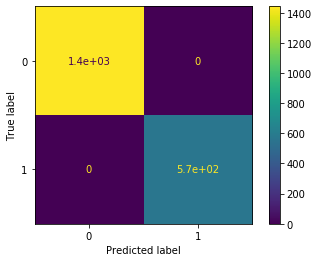

In [170]:
plot_confusion_matrix(lr3, X_test3, y_test3)

confusion3 = confusion_matrix(y_testb, y_predb)
TP3 = confusion3[1,1]
FP3 = confusion3[0,1]
FN3 = confusion3[1,0]
TN3 = confusion3[0,0]
print(TP3,TN3, FP3, FN3)

In [171]:
num_data['target_status'] = numeric_data['target_status']

In [172]:
# Dealing with imbalanced dataset
# First shuffle the dataset
shuffled_mult = num_data.sample(frac=1,random_state=42)
# Put all the "closed" class which is '1' in a separate dataset.
closed_mult = shuffled_mult.loc[shuffled_mult['target_status'] == 1]
acquired_mult = shuffled_mult.loc[shuffled_mult['target_status'] == 0].sample(n = 3000, random_state = 42)
#Randomly select 4000 observations from the operating (majority class)
operating_mult = shuffled_mult.loc[shuffled_mult['target_status'] == 2].sample(n=3000,random_state=42)
balanced_mult = pd.concat([closed_mult, acquired_mult, operating_mult])

In [173]:
balanced_mult.drop(['market', 'country_code'], axis =1, inplace = True)
X_mult = balanced_mult.drop('target_status', axis = 1)
y_mult = balanced_mult['target_status']

In [174]:
X_trainm, X_testm, y_trainm, y_testm = train_test_split(X_mult, y_mult, test_size = 0.3, random_state = 45)
lregm = LogisticRegression().fit(X_trainm, y_trainm)
lregm.score(X_testm, y_testm)

0.4223169314219295

In [175]:
y_predm= lregm.predict(X_testm)
y_truem = y_testm
print(classification_report(y_truem, y_predm))

              precision    recall  f1-score   support

           0       0.43      0.72      0.54       892
           1       0.21      0.01      0.02       771
           2       0.42      0.48      0.45       918

    accuracy                           0.42      2581
   macro avg       0.35      0.40      0.33      2581
weighted avg       0.36      0.42      0.35      2581



In [176]:
scalerm = StandardScaler()
Xsm = scaler.fit_transform(X_mult)
lr_scalarm = LogisticRegression(solver='lbfgs', penalty ='none', max_iter = 1000, random_state = 42)
cross_val_score(lr_scalarm, Xsm, y_mult, cv=10).mean()

0.7549658320503471

In [177]:
X_trainsm,X_testsm, y_trainsm, y_testsm = train_test_split(Xsm, y_mult, test_size = 0.3, random_state = 45)
lregsm = LogisticRegression().fit(X_trainsm, y_trainsm)
lregsm.score(X_testsm, y_testsm)

0.7528089887640449

In [178]:
y_predsm= lregsm.predict(X_testsm)
y_truesm = y_testsm
print(classification_report(y_truesm, y_predsm))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       892
           1       0.60      0.53      0.56       771
           2       0.64      0.70      0.67       918

    accuracy                           0.75      2581
   macro avg       0.75      0.74      0.74      2581
weighted avg       0.75      0.75      0.75      2581



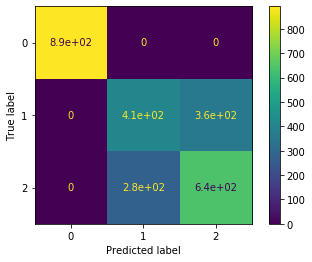

In [179]:
plot_confusion_matrix(lregsm, X_testsm, y_testsm)

In [180]:
rfcm = ensemble.RandomForestClassifier()
cross_val_score(rfcm, X_trainsm, y_trainsm, cv=10)

array([0.72968491, 0.74958541, 0.71428571, 0.72757475, 0.7358804 ,
       0.76079734, 0.73421927, 0.75747508, 0.72757475, 0.74584718])

In [184]:
investments_df['market'].value_counts()

 Software                          4527
 Biotechnology                     3588
 Mobile                            1944
 E-Commerce                        1739
 Curated Web                       1630
                                   ... 
 Gas                                  1
 In-Flight Entertainment              1
 Golf Equipment                       1
 Cable                                1
 Radical Breakthrough Startups        1
Name: market, Length: 752, dtype: int64